In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

In [2]:
def get_atoms(text, fontsize):
    myfont = ImageFont.truetype("fonts/ipaexg.ttf", fontsize)
    img = Image.new('1', (200, 200), 'white')
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), text, font=myfont)

    w, h = img.size
    rx = []
    ry = []
    for x in range(w):
        for y in range(h):
            v = img.getpixel((x, y))
            if v is 0:
                rx.append(float(x))
                ry.append(h - float(y))
    nx = np.array(rx)
    ny = np.array(ry)
    nx -= np.min(nx)
    ny -= np.min(ny)
    return nx, ny

In [3]:
def get_bonds(rx, ry):
    n = len(rx)
    bonds = []
    for i in range(n-1):
        for j in range(i + 1, n):
            r2 = (rx[i] - rx[j]) ** 2 + (ry[i] - ry[j]) ** 2
            if r2 < 3.1:
                bonds.append((i, j, r2))
    return bonds

In [4]:
def calculate(vx, vy, rx, ry, bonds):
    dt = 0.01
    G = 0.2
    K = 1000.0

    rx += vx * dt
    ry += vy * dt
    vy -= G * dt

    for i, j, l in bonds:
        dx = rx[j] - rx[i]
        dy = ry[j] - ry[i]
        r2 = dx ** 2 + dy ** 2
        f = K * (r2 - l)
        vx[i] += f*dx*dt
        vy[i] += f*dy*dt
        vx[j] -= f*dx*dt
        vy[j] -= f*dy*dt

    for i, y in enumerate(ry):
        if y < 0.0:
            vy[i] -= 10.0 * y * dt

In [6]:
def get_img(qx, qy, w, h):
    img = np.zeros((h,w))
    for x,y in zip(qx,qy):
        x = int(x)
        y = int(y)
        if x in range(w) and y in range(h):
            img[h-y-1][x] = 1.0
    return img


In [5]:
def simulate(rx, ry, bonds):
    vx = np.zeros_like(rx)
    vy = np.zeros_like(rx)
    w = np.max(rx).astype(np.int)
    h = np.max(ry).astype(np.int)
    imgs = []
    for i in range(2000):
        if i % 100 is 0:
            img = get_img(rx, ry, w, h)
            imgs.append(img.copy())
            plt.imshow(img)
            plt.show()
        calculate(vx, vy, rx, ry, bonds)
    return imgs

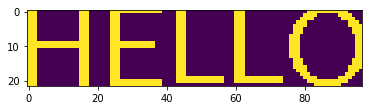

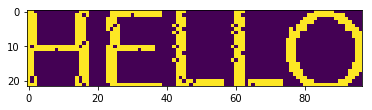

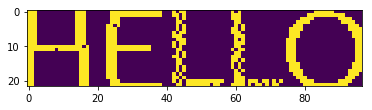

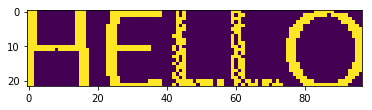

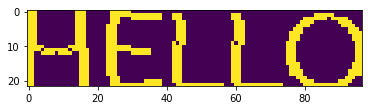

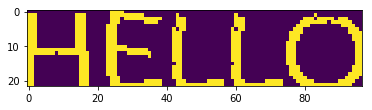

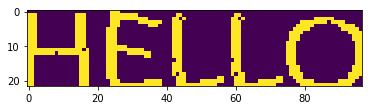

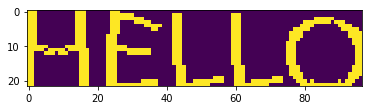

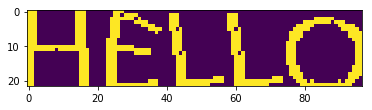

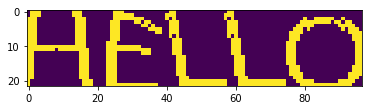

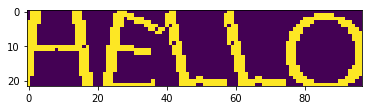

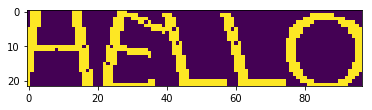

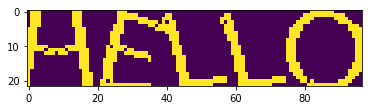

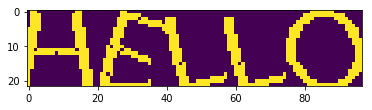

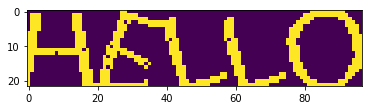

In [ ]:
rx, ry = get_atoms("HELLO",32)
bonds = get_bonds(rx, ry)
imgs = simulate(rx, ry, bonds)


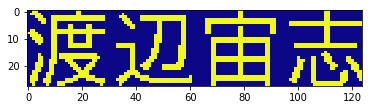

In [12]:
fig = plt.figure()
im = plt.imshow(imgs[0],cmap="plasma")

In [13]:
def update(i):
    im.set_array(imgs[i])

ani = animation.FuncAnimation(fig, update,frames=len(imgs))
rc('animation', html='jshtml')
ani